In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importación librerías
import pandas as pd
import numpy as np

In [3]:
# Carga de datos de archivo .csv
dataTraining = pd.read_csv('https://raw.githubusercontent.com/davidzarruk/MIAD_ML_NLP_2023/main/datasets/dataTrain_carListings.zip')
dataTesting = pd.read_csv('https://raw.githubusercontent.com/davidzarruk/MIAD_ML_NLP_2023/main/datasets/dataTest_carListings.zip', index_col=0)

In [4]:
# Visualización datos de entrenamiento
dataTraining.head()

,Price,Year,Mileage,State,Make,Model
0,34995,2017,9913,FL,Jeep,Wrangler
1,37895,2015,20578,OH,Chevrolet,Tahoe4WD
2,18430,2012,83716,TX,BMW,X5AWD
3,24681,2014,28729,OH,Cadillac,SRXLuxury
4,26998,2013,64032,CO,Jeep,Wrangler


In [5]:
# Visualización datos de test
dataTesting.head()

,Year,Mileage,State,Make,Model
ID,,,,,
0,2014,31909,MD,Nissan,MuranoAWD
1,2017,5362,FL,Jeep,Wrangler
2,2014,50300,OH,Ford,FlexLimited
3,2004,132160,WA,BMW,5
4,2015,25226,MA,Jeep,Grand


In [6]:
#dimension
print("El archivo tiene la siguiente dimension: ",dataTraining.shape)


El archivo tiene la siguiente dimension:  (400000, 6)


In [7]:
#Tipos de variables y revisión de datos nulos
dataTraining.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400000 entries, 0 to 399999
Data columns (total 6 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   Price    400000 non-null  int64 
 1   Year     400000 non-null  int64 
 2   Mileage  400000 non-null  int64 
 3   State    400000 non-null  object
 4   Make     400000 non-null  object
 5   Model    400000 non-null  object
dtypes: int64(3), object(3)
memory usage: 18.3+ MB


In [8]:
#Validando que el df no tenga duplicados
duplicados = dataTraining.duplicated().sum()
print("Número total de duplicados:", duplicados)

# Eliminando duplicados
df_train2 = dataTraining.drop_duplicates()
print("Tamaño de DataFrame con duplicados: {} y Tamaño de DataFrame sin duplicados: {}".format(dataTraining.shape[0], df_train2.shape[0]))

Número total de duplicados: 169
Tamaño de DataFrame con duplicados: 400000 y Tamaño de DataFrame sin duplicados: 399831


In [9]:
#validando que los campos no tengan nulos
# Contar los valores nulos en cada columna
valores_nulos_por_columna = df_train2.isnull().sum()
# Filtrar las columnas que tienen valores nulos
columnas_con_nulos = valores_nulos_por_columna[valores_nulos_por_columna > 0]

# Imprimir los resultados
print("Valores nulos por columna:")
print(columnas_con_nulos)

Valores nulos por columna:
Series([], dtype: int64)


Resumen estadístico de las variables numéricas
               Price           Year       Mileage
count  399831.000000  399831.000000  3.998310e+05
mean    21143.998537    2013.196591  5.509327e+04
std     10751.954687       3.292060  4.087644e+04
min      5001.000000    1997.000000  5.000000e+00
25%     13499.000000    2012.000000  2.586450e+04
50%     18449.000000    2014.000000  4.297000e+04
75%     26999.000000    2016.000000  7.745400e+04
max     79999.000000    2018.000000  2.457832e+06


<Figure size 1500x1200 with 0 Axes>

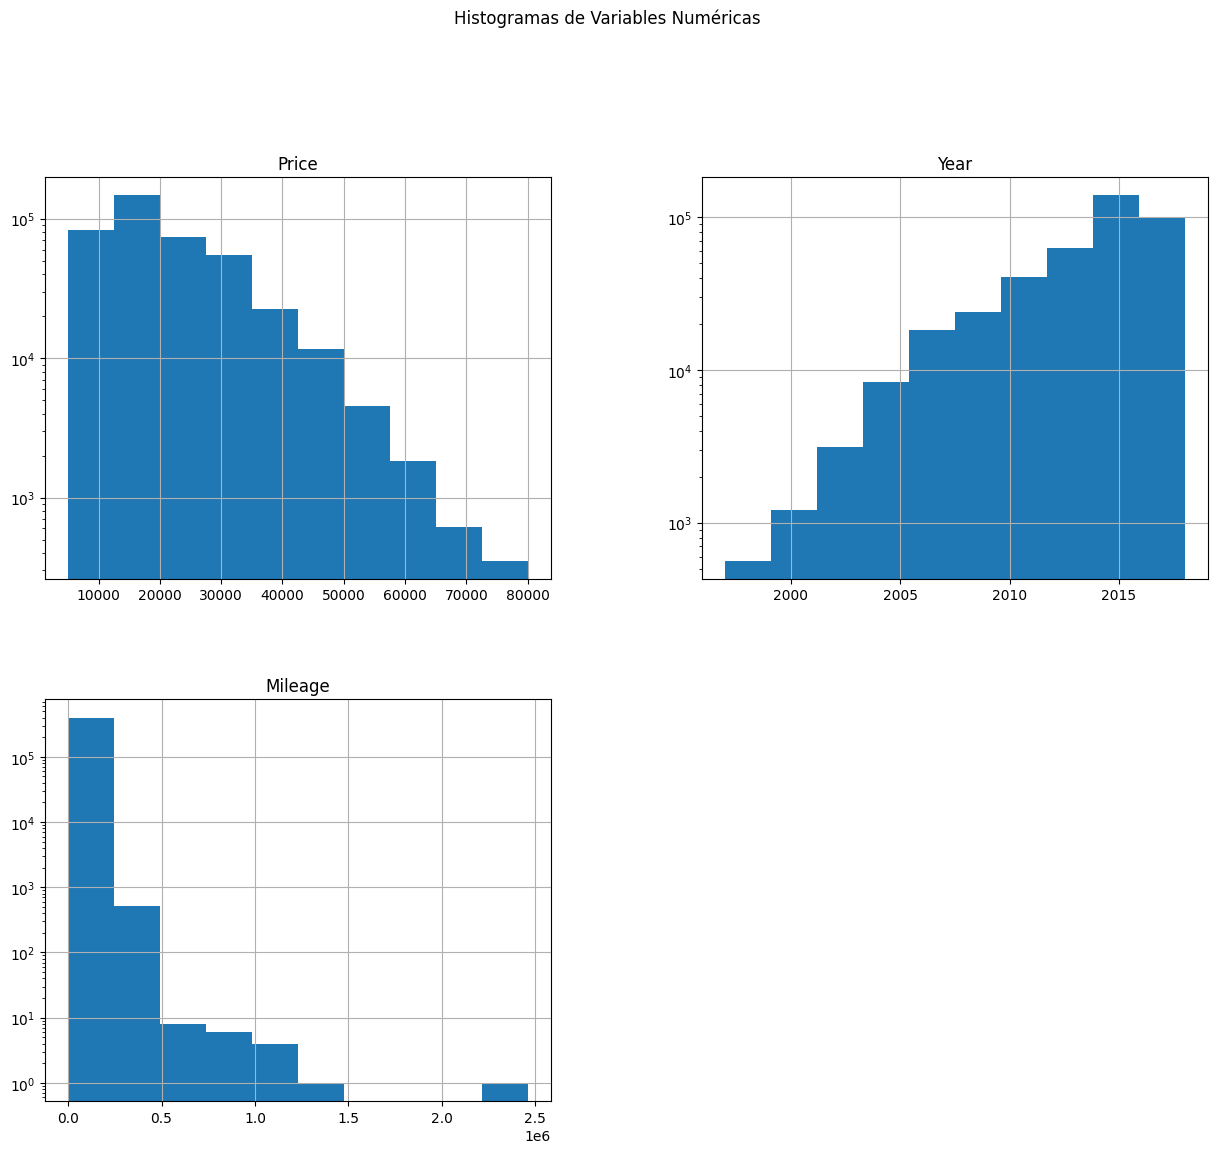

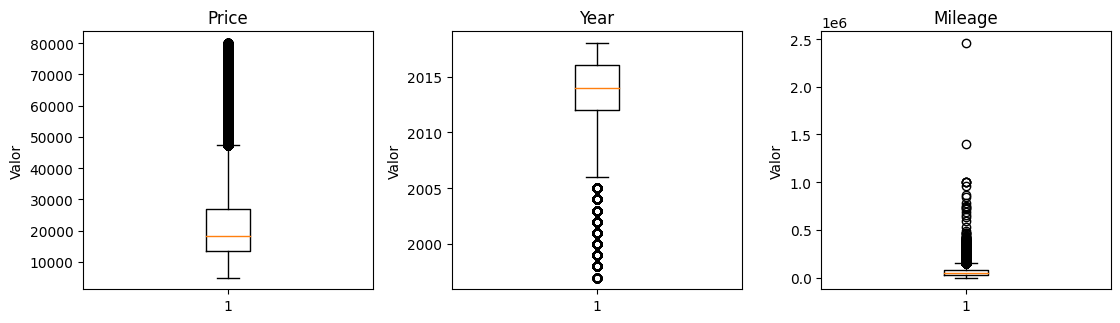

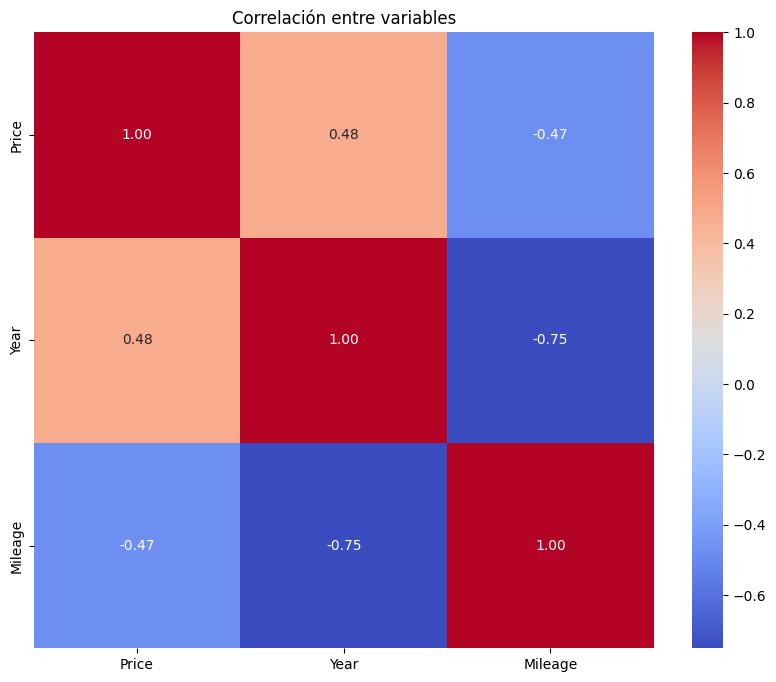

In [10]:
# Resumen estadístico de las variables numéricas
print("Resumen estadístico de las variables numéricas")
print(df_train2.describe())

#Distribucciones de las variables numericas
import matplotlib.pyplot as plt
import seaborn as sns

df_numeric = df_train2.select_dtypes(include=['int', 'float'])
# Histogramas de las variables numéricas
plt.figure(figsize=(15, 12))
df_numeric.hist(figsize=(15, 12), log=True)
plt.suptitle("Histogramas de Variables Numéricas", y=1.02)
plt.show()

#Analizando valores atipicos
plt.figure(figsize=(15, 12))
for i, col in enumerate(df_numeric.columns):
    plt.subplot(4, 4, i+1) 
    plt.boxplot(df_numeric[col])
    plt.title(col)
    plt.ylabel("Valor")
plt.tight_layout()
plt.show()

# Correlación general y mapa de calor
correlation_matrix = df_numeric.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlación entre variables')
plt.show()

Valor unicos de las variables categoricas
Columna: State
State
 TX    45914
 CA    36512
 FL    33713
 GA    18180
 NC    17928
 IL    16788
 VA    15893
 PA    13035
 NY    12446
 NJ    12130
 OH    11364
 WA    10898
 CO    10870
 AZ    10747
 TN     9273
 MA     8586
 MD     8243
 MO     8029
 IN     7850
 KY     6688
 AL     6282
 WI     5612
 MN     5415
 MI     5326
 OK     5096
 CT     4942
 OR     4907
 SC     4814
 UT     4795
 LA     3847
 KS     3704
 NV     3332
 AR     3125
 MS     3043
 NH     2744
 NE     2522
 IA     2325
 NM     2280
 ID     1736
 DE     1221
 HI     1180
 MT      997
 ME      965
 RI      833
 AK      813
 ND      681
 WV      666
 SD      621
 VT      579
 WY      335
 DC        6
Name: count, dtype: int64


Columna: Make
Make
Ford             62837
Chevrolet        58354
Toyota           45903
Honda            33188
Jeep             24366
GMC              20834
Kia              16341
Dodge            16158
Hyundai          15054
Lexus            136

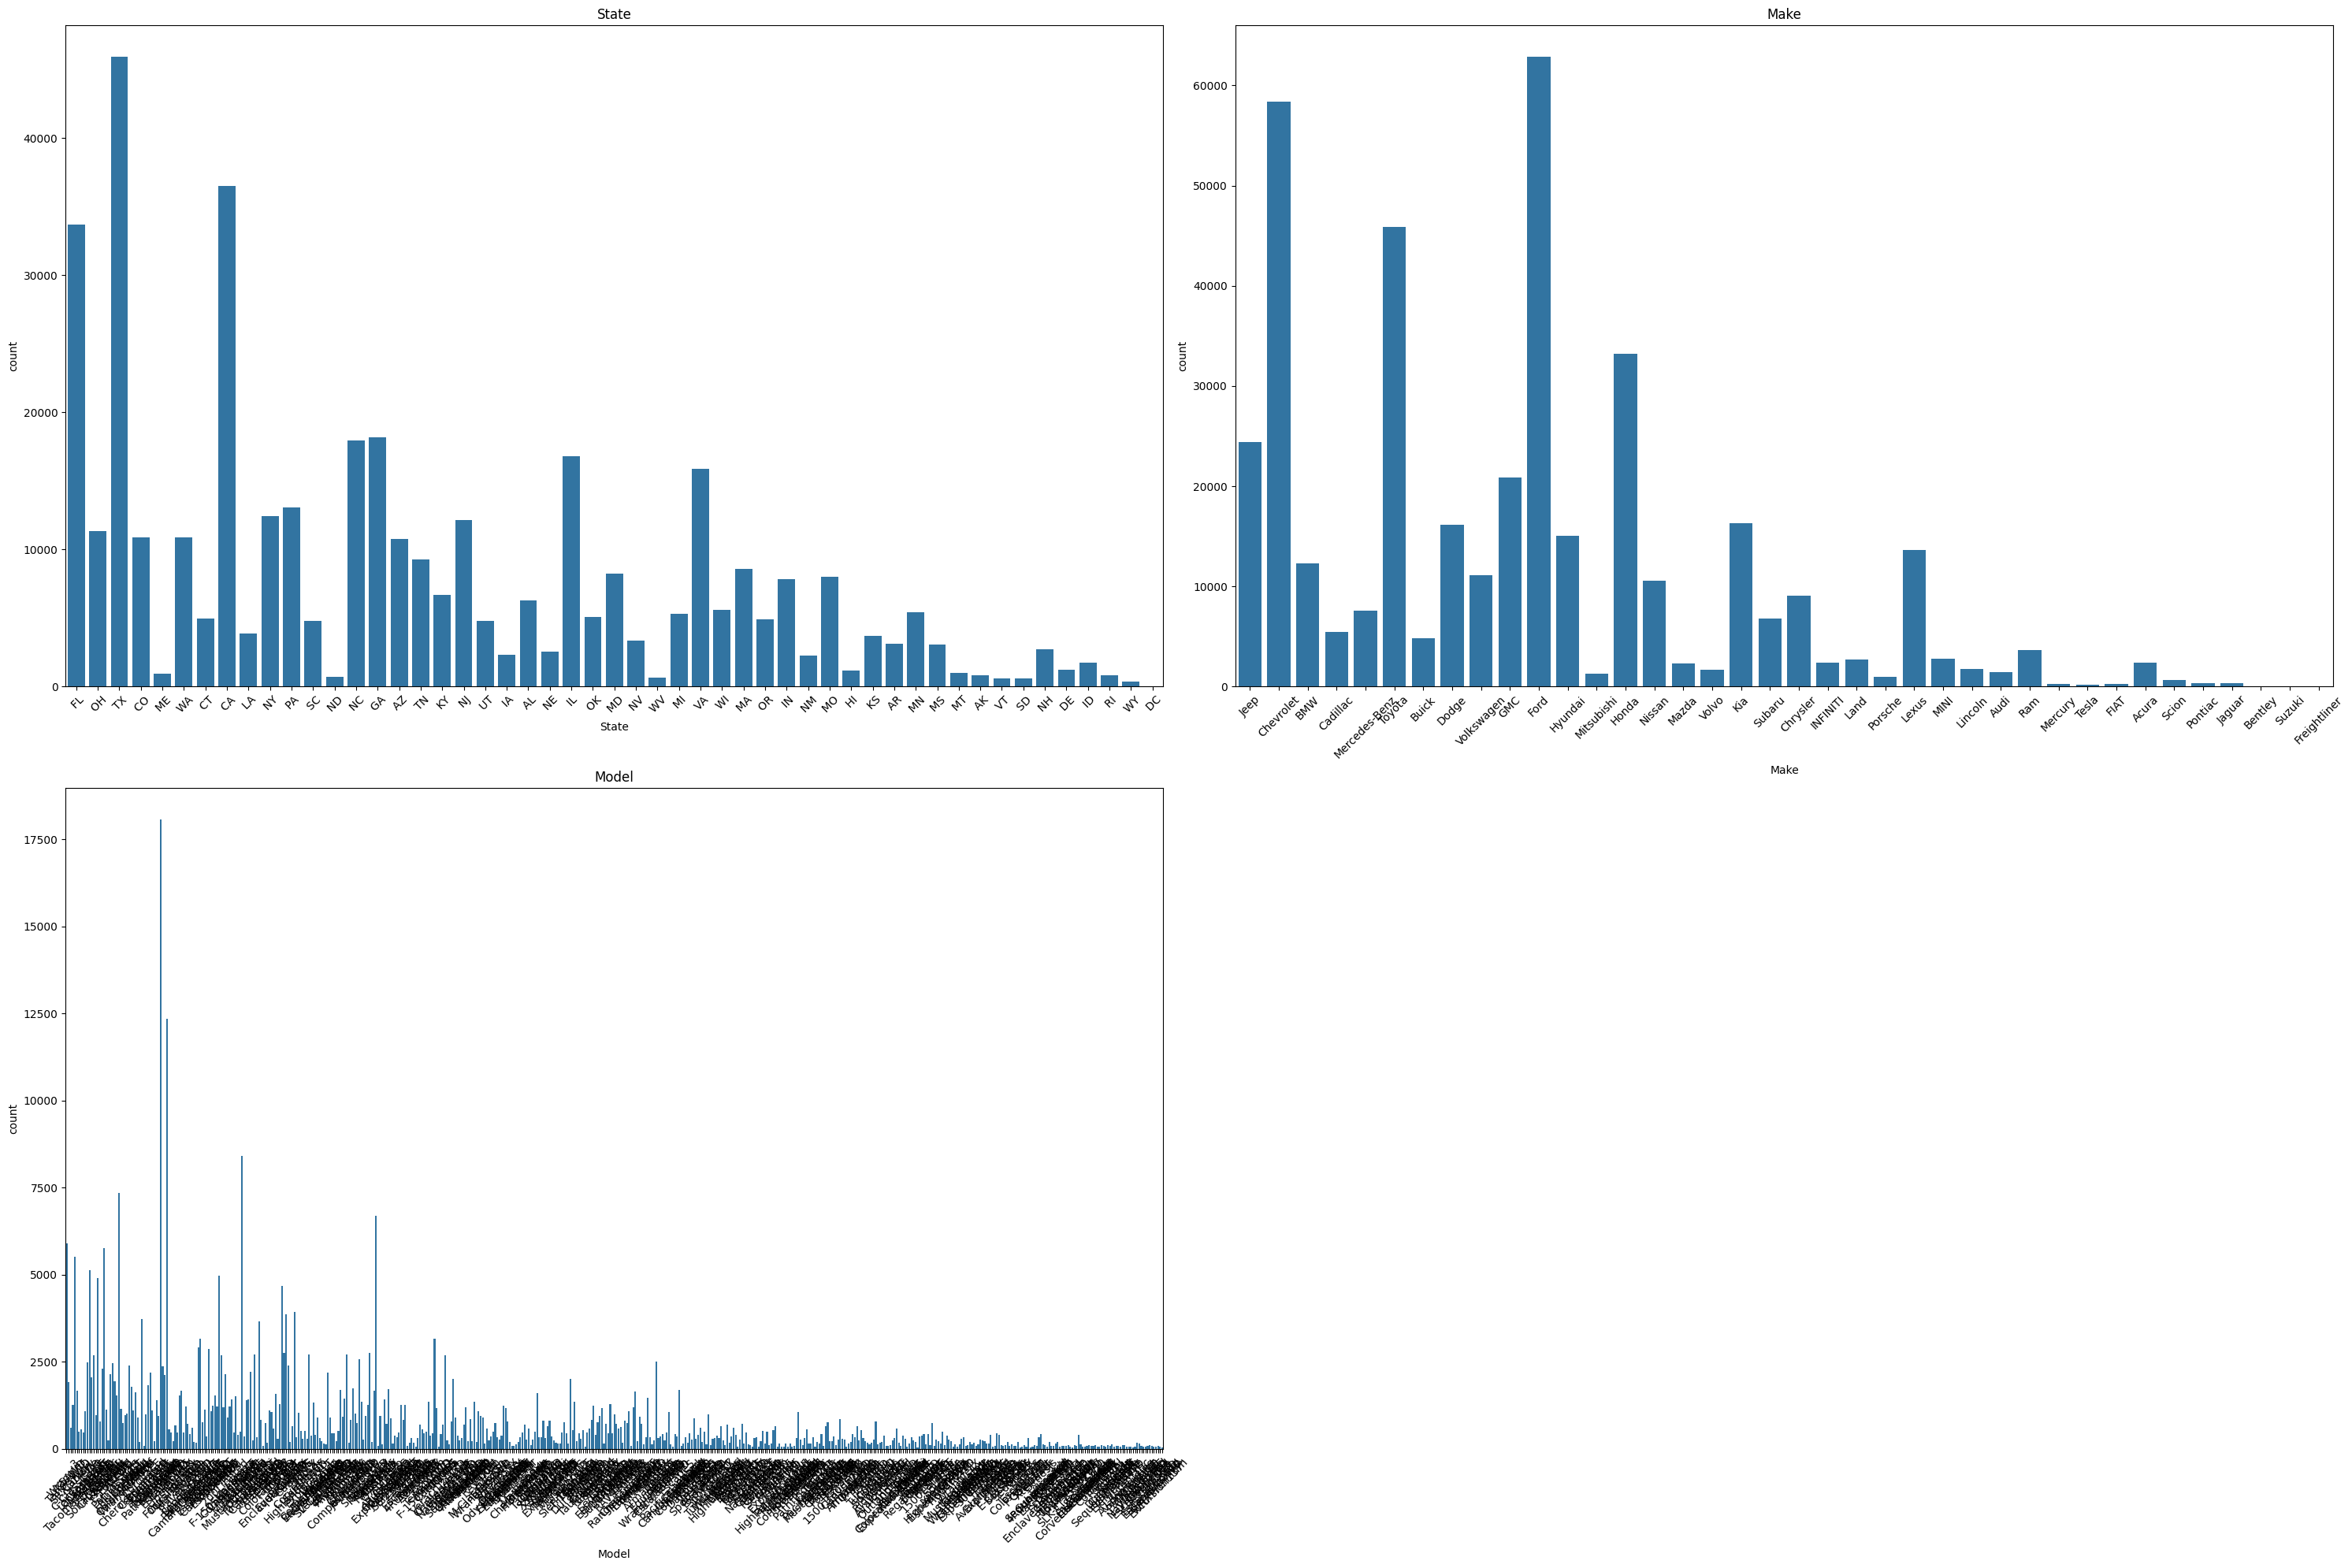

Analisis de correlacion con la variable objeivo price
Relación entre State y la variable objetivo:
State
 AK    21988.726937
 AL    22429.400191
 AR    23750.631360
 AZ    20039.249000
 CA    20526.674408
 CO    21158.158970
 CT    18802.669365
 DC    11872.000000
 DE    21022.352170
 FL    20069.581259
 GA    21073.261166
 HI    17288.082203
 IA    22190.412043
 ID    21879.111751
 IL    20614.453955
 IN    20099.591720
 KS    20964.339093
 KY    20914.152362
 LA    23477.059787
 MA    21391.870603
 MD    20372.163533
 ME    22471.632124
 MI    19750.847728
 MN    21323.823084
 MO    21312.057791
 MS    24357.383174
 MT    25385.744233
 NC    21310.861557
 ND    21483.114537
 NE    22813.591197
 NH    21189.571429
 NJ    20738.000907
 NM    23647.096930
 NV    20494.521309
 NY    21512.411538
 OH    19178.735832
 OK    22249.835557
 OR    21727.162421
 PA    21024.878634
 RI    22026.865546
 SC    21039.551516
 SD    25078.223833
 TN    21121.394910
 TX    23270.200919
 UT    22270.64

In [11]:
#Valor unicos de las variables categoricas
print('Valor unicos de las variables categoricas')
for col in df_train2.select_dtypes(include=['object']).columns:
    print(f"Columna: {col}")
    print(df_train2[col].value_counts())
    print("\n")

#distribuiccion de las variables categoricas
print('Distribuiccion de las variables categoricas')
plt.figure(figsize=(30, 20))
for i, col in enumerate(df_train2.select_dtypes(include=['object']).columns):
    plt.subplot(2, 2, i+1)
    sns.countplot(x=col, data=df_train2)
    plt.title(col)
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#Analisis de correlacion con la variable objeivo price
print('Analisis de correlacion con la variable objeivo price')
for col in df_train2.select_dtypes(include=['object']).columns:
    print(f"Relación entre {col} y la variable objetivo:")
    print(df_train2.groupby(col)['Price'].mean())
    print("\n")

BOXPLOT DE Price
count    399831.000000
mean      21143.998537
std       10751.954687
min        5001.000000
25%       13499.000000
50%       18449.000000
75%       26999.000000
max       79999.000000
Name: Price, dtype: float64


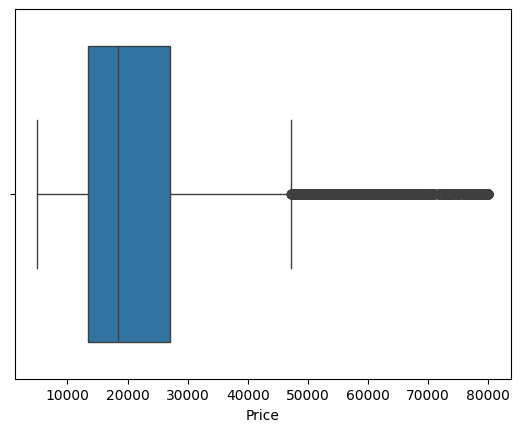

In [12]:
#Datos atipicos en vble Price
print('BOXPLOT DE Price')
sns.boxplot(x='Price', data=df_train2)

descripcion_variable_objetivo = df_train2['Price'].describe()
print(descripcion_variable_objetivo)

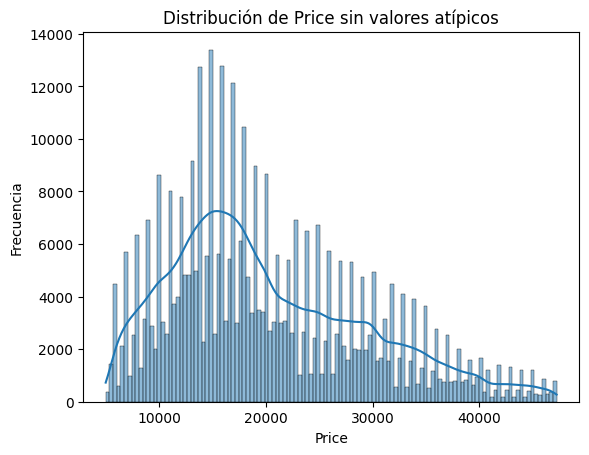

In [13]:
Q1 = df_train2['Price'].quantile(0.25)
Q3 = df_train2['Price'].quantile(0.75)
IQR = Q3 - Q1
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Identificar valores atípicos
valores_atipicos = df_train2[(df_train2['Price'] < limite_inferior) | (df_train2['Price'] > limite_superior)]
df_train3 = df_train2[(df_train2['Price'] >= limite_inferior) & (df_train2['Price'] <= limite_superior)]
sns.histplot(df_train3['Price'], kde=True)
plt.title('Distribución de Price sin valores atípicos')
plt.xlabel('Price')
plt.ylabel('Frecuencia')
plt.show()


In [14]:
# Verificar la cantidad de valores nulos en cada columna
print(df_train3.isnull().sum())

Price      0
Year       0
Mileage    0
State      0
Make       0
Model      0
dtype: int64


# Version 1

In [54]:
from datetime import datetime
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import SelectFromModel

# Calcula o ano atual
current_year = datetime.now().year

# Engenharia de features: calcular a idade do carro
df_train3['Car_Age'] = current_year - df_train3['Year']

# Conversão de tipos de dados para string onde necessário
df_train3['State'] = df_train3['State'].astype('string')
df_train3['Make'] = df_train3['Make'].astype('string')
df_train3['Model'] = df_train3['Model'].astype('string')

# Preparação dos dados
X = df_train3.drop('Price', axis=1)
y = df_train3['Price']

# Divisão dos dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Engineering adicional com Polynomial Features
polynomial_transformer = Pipeline(steps=[
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('scaler', StandardScaler())
])

# Preprocessamento com pipelines
categorical_features = X_train.select_dtypes(include=['string']).columns
numerical_features = X_train.select_dtypes(exclude=['object', 'category', 'string']).columns

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features),
        ('poly', polynomial_transformer, numerical_features)
    ])

# Modelo XGBoost com pipeline
xgb_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('feature_selection', SelectFromModel(XGBRegressor(n_estimators=100))),
    ('regressor', XGBRegressor(objective='reg:squarederror', random_state=42))
])

# Definição de parâmetros para RandomizedSearchCV
parameters = {
    'regressor__n_estimators': [100, 200, 300, 400],
    'regressor__max_depth': [3, 5, 7, 9],
    'regressor__learning_rate': [0.01, 0.05, 0.1, 0.2],
    'regressor__subsample': [0.7, 0.8, 0.9, 1.0],
    'regressor__colsample_bytree': [0.7, 0.8, 0.9, 1.0],
    'regressor__reg_lambda': [1, 1.5, 2, 2.5],
    'regressor__gamma': [0, 0.1, 0.5, 1]
}

random_search = RandomizedSearchCV(xgb_pipeline, parameters, n_iter=150, cv=5, scoring='neg_mean_squared_error', verbose=1, random_state=42)
random_search.fit(X_train, y_train)

# Melhor modelo e métricas
best_xgb = random_search.best_estimator_
y_pred = best_xgb.predict(X_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print("Melhor RMSE com RandomizedSearchCV:", rmse)
print("Melhores parâmetros encontrados:", random_search.best_params_)

Fitting 5 folds for each of 150 candidates, totalling 750 fits
Melhor RMSE com RandomizedSearchCV: 3827.455029909161
Melhores parâmetros encontrados: {'regressor__subsample': 0.8, 'regressor__reg_lambda': 2.5, 'regressor__n_estimators': 400, 'regressor__max_depth': 7, 'regressor__learning_rate': 0.2, 'regressor__gamma': 0.1, 'regressor__colsample_bytree': 0.9}


In [96]:
from datetime import datetime
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, StackingRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

# Calcula o ano atual
current_year = datetime.now().year

# Engenharia de features: calcular a idade do carro
df_train3['Car_Age'] = current_year - df_train3['Year']

# Conversão de tipos de dados para string onde necessário
df_train3['State'] = df_train3['State'].astype('string')
df_train3['Make'] = df_train3['Make'].astype('string')
df_train3['Model'] = df_train3['Model'].astype('string')

# Preparação dos dados
X = df_train3.drop('Price', axis=1)
y = df_train3['Price']

# Divisão dos dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessamento com pipelines para numéricas e categóricas
numerical_features = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X_train.select_dtypes(include=['object', 'category', 'string']).columns

numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Definição dos modelos base para o ensemble
estimators = [
    ('rf', RandomForestRegressor(n_estimators=100)),
    ('gb', GradientBoostingRegressor(n_estimators=100)),
    ('svr', SVR(C=1.0, epsilon=0.2))
]

# Definição do modelo de stacking
stack_reg = StackingRegressor(
    estimators=estimators,
    final_estimator=XGBRegressor(n_estimators=500, learning_rate=0.05, max_depth=5, random_state=42),
    cv=5
)

# Pipeline final com stacking
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('stacking', stack_reg)
])

# Treinamento do modelo
model_pipeline.fit(X_train, y_train)
y_pred = model_pipeline.predict(X_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print(f"Final RMSE: {rmse}")


### Version 2

In [15]:
from datetime import datetime
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor

# Calcula o ano atual
current_year = datetime.now().year

# Engenharia de features: calcular a idade do carro
df_train3['Car_Age'] = current_year - df_train3['Year']
df_train3['Mileage_per_Year'] = df_train3['Mileage'] / df_train3['Car_Age']  # Adicionando a feature de razão entre features

# Conversão de tipos de dados para string onde necessário
df_train3['State'] = df_train3['State'].astype('string')
df_train3['Make'] = df_train3['Make'].astype('string')
df_train3['Model'] = df_train3['Model'].astype('string')

# Preparação dos dados
X = df_train3.drop('Price', axis=1)
y = df_train3['Price']

# Divisão dos dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessamento com pipelines
categorical_features = X_train.select_dtypes(include=['string']).columns
numerical_features = X_train.select_dtypes(exclude=['object', 'category', 'string']).columns
categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])
numerical_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='mean')), ('scaler', StandardScaler())])
polynomial_transformer = Pipeline(steps=[('poly', PolynomialFeatures(degree=2, include_bias=False)), ('scaler', StandardScaler())])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features),
        ('poly', polynomial_transformer, numerical_features)
    ])

# Configuração do modelo XGBoost com pipeline
xgb_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', XGBRegressor(objective='reg:squarederror', random_state=42))
])

# Definição de parâmetros para RandomizedSearchCV
parameters = {
    'regressor__n_estimators': [100, 200, 300, 400],
    'regressor__max_depth': [3, 5, 7, 9],
    'regressor__learning_rate': [0.01, 0.05, 0.1, 0.2],
    'regressor__subsample': [0.7, 0.8, 0.9, 1.0],
    'regressor__colsample_bytree': [0.7, 0.8, 0.9, 1.0],
    'regressor__reg_lambda': [1, 1.5, 2, 2.5],
    'regressor__gamma': [0, 0.1, 0.5, 1]
}

random_search = RandomizedSearchCV(xgb_pipeline, parameters, n_iter=150, cv=5, scoring='neg_mean_squared_error', verbose=1, random_state=42)
random_search.fit(X_train, y_train)

# Melhor modelo e métricas
best_xgb = random_search.best_estimator_
y_pred = best_xgb.predict(X_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print("Melhor RMSE com RandomizedSearchCV:", rmse)
print("Melhores parâmetros encontrados:", random_search.best_params_)

Fitting 5 folds for each of 150 candidates, totalling 750 fits
Melhor RMSE com RandomizedSearchCV: 2954.6487201548316
Melhores parâmetros encontrados: {'regressor__subsample': 0.7, 'regressor__reg_lambda': 2, 'regressor__n_estimators': 400, 'regressor__max_depth': 9, 'regressor__learning_rate': 0.2, 'regressor__gamma': 0, 'regressor__colsample_bytree': 0.7}


In [17]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

dataTesting['State'] = label_encoder.fit_transform(dataTesting['State'])
dataTesting['Make'] = label_encoder.fit_transform(dataTesting['Make'])
dataTesting['Model'] = label_encoder.fit_transform(dataTesting['Model'])
dataTesting.head(10)

,Year,Mileage,State,Make,Model
ID,,,,,
0,2014,31909,20,26,305
1,2017,5362,9,16,489
2,2014,50300,35,10,211
3,2004,132160,47,2,27
4,2015,25226,19,16,248
5,2017,25684,3,6,129
6,2016,56126,3,17,424
7,2015,28767,9,19,256
8,2015,58981,43,6,436


In [18]:
# Carregando o conjunto de dados de teste
dataTesting = pd.read_csv('https://raw.githubusercontent.com/davidzarruk/MIAD_ML_NLP_2023/main/datasets/dataTest_carListings.zip', index_col=0)

# Aplicando as mesmas transformações do conjunto de treinamento
current_year = datetime.now().year
dataTesting['Car_Age'] = current_year - dataTesting['Year']

# Assumindo que temos uma coluna 'Mileage'
dataTesting['Mileage_per_Year'] = dataTesting['Mileage'] / dataTesting['Car_Age']

In [19]:
y_predmodelo1 = best_xgb.predict(dataTesting)

In [20]:
print(y_predmodelo1[:5])  # Prints the first five elements

[21397.623  36299.97   23593.645   7922.0933 30208.482 ]


In [21]:
import numpy as np
import pandas as pd

# Assuming y_predmodelo1 is your NumPy array
df = pd.DataFrame(y_predmodelo1) 


# Rename the default column (likely '0') to 'Price'
df = df.rename(columns={0: 'Price'}) 

# Save to CSV 
df.to_csv("modelocalibrado5.csv", index_label='ID') 
